In [18]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np

In [59]:
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["mask"]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [26]:
pytrends.interest_over_time()

,mask,isPartial
date,,
2015-05-31,10,False
2015-06-07,11,False
2015-06-14,10,False
2015-06-21,11,False
2015-06-28,11,False
...,...,...
2020-04-26,67,False
2020-05-03,62,False
2020-05-10,61,False


In [ ]:
pytrends.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=5, day_end=25, hour_end=0, cat=0, geo='', gprop='', sleep=0)

In [12]:
df = pytrends.trending_searches(pn="united_states")
df.head(50)

,0
0,Jeffrey Epstein
1,Fortnite Item Shop
2,Larry Kramer
3,Hong Kong
4,Disney World
5,Billie Eilish
6,Tropical Storm Bertha 2020
7,Breonna Taylor
8,Sofia Vergara
9,IRS stimulus


In [14]:
df = pytrends.today_searches(pn="US")

In [15]:
df

0                Jeffrey Epstein
1             Fortnite Item Shop
2                   Larry Kramer
3                      Hong Kong
4                   Disney World
5                  Billie Eilish
6     Tropical Storm Bertha 2020
7                 Breonna Taylor
8                  Sofia Vergara
9                   IRS stimulus
10                Chrissy Teigen
11               Tuesday Morning
12                    Ed Sheeran
13                       Forgery
14            Black Lives Matter
15                   Mac McClung
16                   John Boyega
Name: query, dtype: object

In [23]:
keywords = pytrends.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid', inplace= True)

In [24]:
df

,title,type
0,Mercedes-Benz,Automobile company
1,Mercedes-Benz A-Class,Mid-size car
2,Mercedes-Benz E-Class,Luxury vehicle
3,Mercedes-Benz S-Class,Luxury vehicle
4,Mercedes-Benz M-Class,SUV


In [152]:
import time
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import statsmodels.api as sm

In [67]:
pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["bootcamp"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [68]:
df_bootcamp = pytrends.interest_over_time()

In [69]:
df_bootcamp.reset_index(inplace=True)
df_bootcamp['ds'] = pd.to_datetime(df_bootcamp['date'])
df_bootcamp.drop(['isPartial', 'date'], inplace=True, axis=1)
df_bootcamp.rename(columns = {'bootcamp':'y'}, inplace = True)
df_bootcamp

,y,ds
0,80,2015-05-31
1,77,2015-06-07
2,76,2015-06-14
3,78,2015-06-21
4,71,2015-06-28
...,...,...
256,55,2020-04-26
257,56,2020-05-03
258,62,2020-05-10
259,64,2020-05-17


In [70]:
df_bootcamp.shape

(261, 2)

In [71]:
train_dataset = df_bootcamp.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future= prophet_basic.make_future_dataframe(periods=365)
future.tail(100)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
526,2021-02-14
527,2021-02-15
528,2021-02-16
529,2021-02-17
530,2021-02-18
...,...
621,2021-05-20
622,2021-05-21
623,2021-05-22
624,2021-05-23


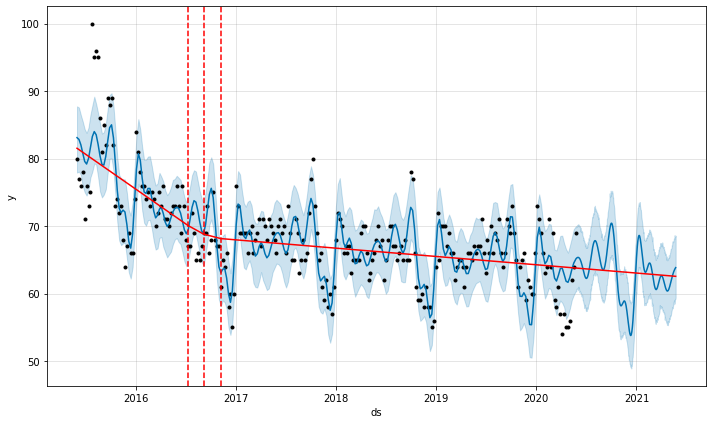

In [157]:
forecast=prophet_basic.predict(future)
#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), prophet_basic, forecast)

[[<matplotlib.lines.Line2D at 0x1baeeddb688>],

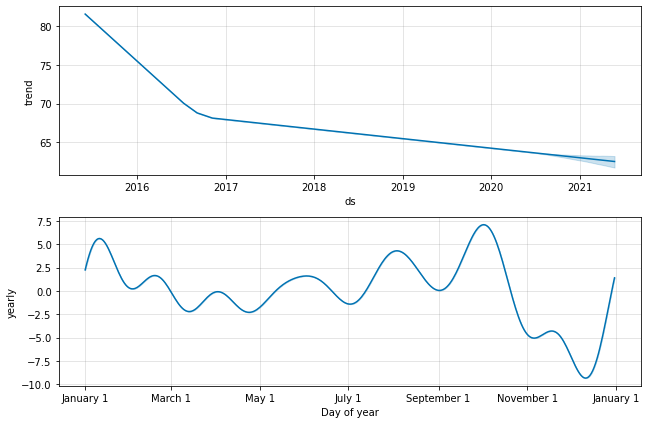

In [73]:
fig1 = prophet_basic.plot_components(forecast)

In [74]:
# access predictions
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
621,2021-05-20,62.568375,58.956959,68.148419,61.805931,63.257784,0.977565,0.977565,0.977565,0.977565,0.977565,0.977565,0.0,0.0,0.0,63.545940
622,2021-05-21,62.565010,59.052516,68.191374,61.799029,63.257761,1.064876,1.064876,1.064876,1.064876,1.064876,1.064876,0.0,0.0,0.0,63.629886
623,2021-05-22,62.561644,59.045377,68.279820,61.791803,63.257812,1.145229,1.145229,1.145229,1.145229,1.145229,1.145229,0.0,0.0,0.0,63.706873
624,2021-05-23,62.558279,58.862243,68.545717,61.784612,63.258391,1.218911,1.218911,1.218911,1.218911,1.218911,1.218911,0.0,0.0,0.0,63.777190
625,2021-05-24,62.554913,59.394925,68.702008,61.777546,63.257695,1.286171,1.286171,1.286171,1.286171,1.286171,1.286171,0.0,0.0,0.0,63.841084


In [102]:
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup, NavigableString, Comment

In [150]:
class find_news:
    def __init__(self, term):
        self.term = term
        self.subjectivity = 0
        self.sentiment = 0
        self.url = 'https://www.google.com/search?q={0}&source=lnms&tbm=nws'.format(self.term)
        
    def get_sentiment(self):
        response = requests.get(self.url)
#         print(response.text)
        soup = BeautifulSoup(response.text, 'html.parser')
        headline_results = soup.find_all('div', class_ = 'kCrYT')
        for h in headline_results:
            title = h.text.strip()
            blob = TextBlob(h.get_text())
            print (f"Headline: {title}")
            print (f"Sentiment: {blob.sentiment.polarity}")
            print (f"Subjectivity: {blob.sentiment.subjectivity}")
            print ('\n')
#             , Sentiment: {blob.sentiment.polarity}, Subjectivity: {blob.sentiment.subjectivity}")
            self.sentiment += blob.sentiment.polarity / len(headline_results)
            self.subjectivity += blob.sentiment.subjectivity / len(headline_results)
        print (f'Average Sentiment: {self.sentiment}, Average Subjectivity: {self.subjectivity}')
            
            

In [151]:
bootcamp = find_news('bootcamp')
bootcamp.get_sentiment()
# print (bootcamp.term, "Subjectivity: ", bootcamp.subjectivity, "Sentiment: ", bootcamp.sentiment)

Headline: University cancels NevadaFIT freshmen academic bootcamp for 2020Nevada Today
Sentiment: 0.0
Subjectivity: 0.0


Headline: 6 days ago · University cancels NevadaFIT freshmen academic bootcamp for 2020. A program filled with large group activities of over 100 or more students in...
Sentiment: 0.2785714285714286
Subjectivity: 0.45714285714285713


Headline: Become a Photo Editing Master for $49 With Adobe CC BootcampCafeMom
Sentiment: 0.0
Subjectivity: 0.0


Headline: 2 hours ago · be_ixf; php_sdk; php_sdk_1.4.18; http://thestir.cafemom.com/shop/225463/become-a-photo-editing-master-for-49-adobe-cc-bootcamp...
Sentiment: 0.0
Subjectivity: 0.0


Headline: Learn Today's Best Social Media Practices with This $30 BundleThe Advocate
Sentiment: 0.5166666666666667
Subjectivity: 0.18333333333333332


Headline: 12 hours ago · Learn how to do it in The 2020 Social Media Marketing Bootcamp Certification Bundle. This seven-course, 34-hour bundle is led by Boot Camp...
Sentiment: 0.0333333333